In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 

In [116]:
X, y = make_classification(n_samples = 10000, n_features = 5)

In [118]:
X.shape, y.shape

((10000, 5), (10000,))

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [122]:
X_train[0]

array([ 1.37106387,  2.87951099, -1.96110503, -1.07444439, -0.22630784])

In [124]:
y[0]

1

In [126]:
pipeline = Pipeline(steps = [('scaling', StandardScaler()),
                             ('model', LogisticRegression())])

In [128]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('model', LogisticRegression())])

In [130]:
y_pred = pipeline.predict(X_test)

In [132]:
y_pred[0]

0

In [134]:
from sklearn.metrics import classification_report, accuracy_score

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       992
           1       0.89      0.87      0.88      1008

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [138]:
accuracy_score(y_test, y_pred)

0.881

In [140]:
from sklearn.metrics import roc_curve, auc


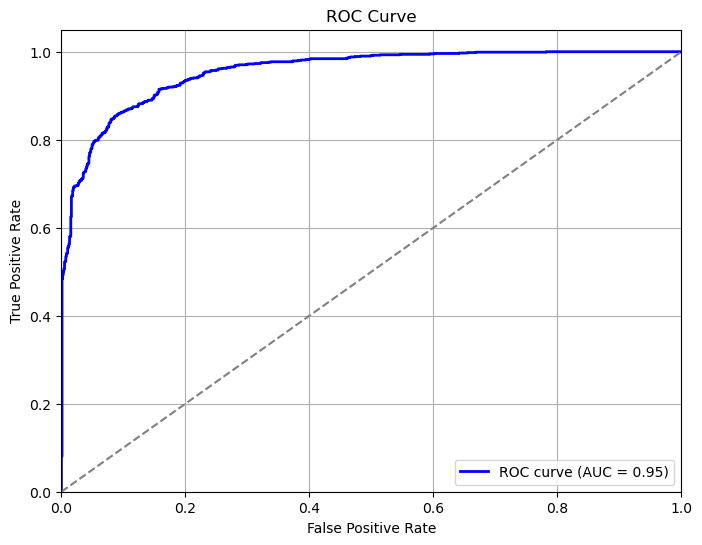

In [142]:
# Get predicted probabilities
y_probs = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs, drop_intermediate = False)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [145]:
X_test[0]

array([-1.88825262,  0.47303461, -1.43919484,  0.95543152, -0.34464308])

In [147]:
X_test[1]

array([-0.90010376,  0.25318268,  1.43673636, -1.72511008,  0.42302945])

In [149]:
import joblib



In [151]:
# Save the pipeline to a file
joblib.dump(pipeline, "model_pipeline.pkl")


['model_pipeline.pkl']